# Practica de Machine Learning

El objetivo de la práctica consiste en calcular el **churn** de clientes en una empresa de telecomunicaciones. Tenemos diversas fuentes de información de diferentes cosechas
*Enero* y *Diciembre*
<br>Además, dentro de cada una de ellas tenemos información adyacente acerca de:
- Clientes mes: número de líneas en impago, incidencias , antigüedad, etc
- Productos: conexión, velocidad de conexión y TV
- Consumos: numero de llamdas entrantes y salientes, mb...etc
- Fiananciación: impago fiananciación, 

## 1. Cargar los datasets y construir un único tablón analítico 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn.metrics import normalized_mutual_info_score as nmi

Cargo las cosechas de enero y diciembre, atendiendo al tipo de separación de datos

In [2]:
consumo_ene = pd.read_csv('./enero/consumos_enero.csv', sep = '|')
cliente_ene = pd.read_csv('./enero/clientes_enero.csv', sep = '|')
financia_ene = pd.read_csv('./enero/financiacion_enero.csv', sep = '|')
producto_ene = pd.read_csv('./enero/productos_enero.csv', sep = '|')
consumo_dic = pd.read_csv('./diciembre/consumos_diciembre.csv', sep = '|')
cliente_dic = pd.read_csv('./diciembre/clientes_diciembre.csv', sep = '|')
financia_dic = pd.read_csv('./diciembre/financiacion_diciembre.csv', sep = '|')
producto_dic = pd.read_csv('./diciembre/productos_diciembre.csv', sep = '|')

Echamos un vistazo a las distintas tablas de los cosechas de los mese de enero y diciembre

In [3]:
print('Tamaño de tabla de consumos Enero:',consumo_ene.shape[0])
print('Tamaño de tabla de clientes Enero:',cliente_ene.shape[0])
print('Tamaño de tabla de financiación Enero:',financia_ene.shape[0])
print('Tamaño de tabla de productos Enero:',producto_ene.shape[0])

Tamaño de tabla de consumos Enero: 92711
Tamaño de tabla de clientes Enero: 92711
Tamaño de tabla de financiación Enero: 25332
Tamaño de tabla de productos Enero: 92711


In [4]:
print('Tamaño de tabla de consumos Diciembre:',consumo_dic.shape[0])
print('Tamaño de tabla de clientes Diciembrero:',cliente_dic.shape[0])
print('Tamaño de tabla de financiación Diciembre:',financia_dic.shape[0])
print('Tamaño de tabla de productos Diciembre:',producto_dic.shape[0])

Tamaño de tabla de consumos Diciembre: 95467
Tamaño de tabla de clientes Diciembrero: 95467
Tamaño de tabla de financiación Diciembre: 24198
Tamaño de tabla de productos Diciembre: 95467


Vemos que, salvo las tablas de financiación de las distintas cosechas, el resto presenta el mismo tamaño que su correspondiente tabla de clientes, la cual nos servirá como tabla de referencia o master para juntar la correspondiente tabla analítica a cada cosecha

### 1.1 Clientes

In [5]:
cliente_ene.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,NaN,NaN


In [6]:
cliente_ene.tail()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia
92706,99996,36,215.890326,04/09/2013 01:33 PM,Guadalajara,3,NaN,NaN
92707,99997,68,285.890750,08/08/2003 11:57 PM,Asturias,5,NaN,NaN
92708,99998,20,383.167610,03/27/2013 08:07 PM,Álava,4,NaN,NaN
92709,99999,53,53.301395,01/18/2020 02:30 AM,Sevilla,2,NaN,NaN
92710,100000,18,57.158927,10/22/2009 07:17 PM,Las Palmas,4,NaN,NaN


In [7]:
cliente_dic.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,NaN,NaN
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,NaN,NaN
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,NaN,NaN
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,NaN,NaN
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NaN


Lo primero y antes de todo es comprobar cuantos valores únicos tengo ya que esta tabla es nuestra referencia frente al resto 

In [8]:
print('Enero: ',len(cliente_ene['id'].unique()))
print('Diciembre: ',len(cliente_dic['id'].unique()))

Enero:  92711
Diciembre:  95467


Nuestras tablas master clientes cuenta con todos los valores unicos, es decir, ninguno de ellos se repite 

Comprobamos que ids estan en cada una de las tablas teniendo en cuenta la tabla referencia clientes

In [9]:
print('Clientes en tabla financiacion\n', cliente_ene['id'].isin(financia_ene['id']).value_counts())
print('Clientes en tabla consumos\n',cliente_ene['id'].isin(consumo_ene['id']).value_counts())
print('Clientes en tabla productos\n',cliente_ene['id'].isin(producto_ene['id']).value_counts())

Clientes en tabla financiacion
 False    67379
True     25332
Name: id, dtype: int64
Clientes en tabla consumos
 True    92711
Name: id, dtype: int64
Clientes en tabla productos
 True    92711
Name: id, dtype: int64


In [10]:
print('Clientes en tabla financiacion\n', cliente_dic['id'].isin(financia_dic['id']).value_counts())
print('Clientes en tabla consumos\n',cliente_dic['id'].isin(consumo_dic['id']).value_counts())
print('Clientes en tabla productos\n',cliente_dic['id'].isin(producto_dic['id']).value_counts())

Clientes en tabla financiacion
 False    71269
True     24198
Name: id, dtype: int64
Clientes en tabla consumos
 True    95467
Name: id, dtype: int64
Clientes en tabla productos
 True    95467
Name: id, dtype: int64


### 1.2 TABLAS ANALÍTICAS:

Viendo que clientes conserva toda la información recogida en cada una de las distintas tablas puedo empezar a mergear las tablas teniendo en cuenta la refenencia de partida (tabla clientes) y despues ir añadiendo información a la tabla a la derecha (left) 

#### 1.2.1 ENERO

In [11]:
tabla_interm1_enero = pd.merge(cliente_ene, financia_ene,on = 'id' , how='left')
tabla_interm2_enero = pd.merge(tabla_interm1_enero, producto_ene,on = 'id' , how='left')
resumen_ene = pd.merge(tabla_interm2_enero, consumo_ene,on = 'id' , how='left')

In [12]:
resumen_ene.reset_index(drop= True , inplace=True)

In [13]:
resumen_ene

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,NaN,NaN,NaN,FIBRA,50MB,tv-futbol,95,19,6525,7634,18520
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,NaN,NaN,SI,FIBRA,600MB,tv-futbol,44,36,14471,14541,8016
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,NaN,NaN,SI,ADSL,35MB,tv-futbol,94,27,1428,5248,7106
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,NaN,NaN,NaN,FIBRA,200MB,tv-familiar,186,20,20083,7372,5052
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,NaN,NaN,NaN,NaN,NaN,FIBRA,200MB,tv-futbol,37,32,19078,5009,8686
5,7,55,88.062883,06/14/1996 01:44 AM,Lérida,4,NaN,NaN,SI,31.553269,NaN,ADSL,25MB,tv-futbol,78,96,3032,5118,11695
6,8,21,73.076377,07/02/2004 12:35 PM,La Coruña,4,NaN,NaN,NaN,NaN,NaN,ADSL,30MB,tv-futbol,183,9,16442,7771,13478
7,9,30,395.481514,03/26/2018 10:22 PM,Alicante,3,NaN,NaN,NaN,NaN,NaN,ADSL,35MB,tv-total,152,16,17184,10493,11638
8,11,64,391.692196,09/15/2004 01:49 AM,Córdoba,5,NaN,NaN,NaN,NaN,SI,ADSL,10MB,tv-futbol,97,43,10961,10288,13798
9,12,80,199.380443,07/26/2011 01:33 AM,Las Palmas,2,NaN,NaN,NaN,NaN,SI,FIBRA,100MB,tv-total,187,41,14428,9837,14834


In [14]:
resumen_ene.tail()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
92706,99996,36,215.890326,04/09/2013 01:33 PM,Guadalajara,3,NaN,NaN,NaN,NaN,NaN,ADSL,30MB,tv-futbol,217,96,9059,7735,8823
92707,99997,68,285.890750,08/08/2003 11:57 PM,Asturias,5,NaN,NaN,SI,14.616422,NaN,FIBRA,200MB,tv-futbol,168,99,9303,4798,3996
92708,99998,20,383.167610,03/27/2013 08:07 PM,Álava,4,NaN,NaN,NaN,NaN,NaN,ADSL,20MB,tv-futbol,188,71,19018,1237,16720
92709,99999,53,53.301395,01/18/2020 02:30 AM,Sevilla,2,NaN,NaN,NaN,NaN,NaN,FIBRA,50MB,tv-futbol,138,40,20264,10552,17637
92710,100000,18,57.158927,10/22/2009 07:17 PM,Las Palmas,4,NaN,NaN,NaN,NaN,SI,ADSL,25MB,tv-familiar,217,65,21772,14141,927


#### 1.2.2 DICIEMBRE

In [15]:
tabla_interm1_diciembre = pd.merge(cliente_dic, financia_dic,on = 'id' , how='left')
tabla_interm2_diciembre = pd.merge(tabla_interm1_diciembre, producto_dic,on = 'id' , how='left')
resumen_dic = pd.merge(tabla_interm2_diciembre, consumo_dic,on = 'id' , how='left')

Reseteamos el index para evitar problemas

In [16]:
resumen_dic.reset_index(drop= True , inplace=True)

In [17]:
resumen_dic

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,NaN,NaN,NaN,NaN,NaN,FIBRA,50MB,tv-futbol,110,79,10897,12806,13751
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,NaN,NaN,NaN,NaN,SI,FIBRA,600MB,tv-futbol,189,89,18657,6499,10862
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,NaN,NaN,NaN,NaN,SI,ADSL,35MB,tv-futbol,129,30,15511,17013,16743
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,NaN,NaN,NaN,NaN,NaN,FIBRA,200MB,tv-familiar,51,52,12670,3393,6771
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NaN,NaN,NaN,NaN,ADSL,10MB,tv-futbol,183,3,23756,18436,4485
5,6,51,99.348645,1997-11-04 11:43:00,Huelva,4,NaN,NaN,NaN,NaN,NaN,FIBRA,200MB,tv-futbol,204,51,18428,8956,4764
6,7,55,88.062883,1996-06-14 01:44:00,Lérida,4,NaN,NaN,SI,31.553269,NaN,ADSL,25MB,tv-futbol,217,43,80,16406,19797
7,8,21,73.076377,2004-07-02 12:35:00,La Coruña,4,NaN,NaN,NaN,NaN,NaN,ADSL,30MB,tv-futbol,38,73,19850,11503,19279
8,9,30,395.481514,2018-03-26 22:22:00,Alicante,3,NaN,NaN,NaN,NaN,NaN,ADSL,35MB,tv-total,5,74,4854,19518,382
9,10,23,378.134025,2000-02-18 13:23:00,Madrid,5,1.0,NaN,NaN,NaN,NaN,ADSL,600MB,tv-total,35,89,10188,8889,4748


## 2. Realizar un pre procesado y una limpieza de los datos

Echamos unn vistazo a las variables nulas del resumen de cada cosecha

In [18]:
resumen_ene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92711 entries, 0 to 92710
Data columns (total 19 columns):
id                92711 non-null int64
edad              92711 non-null int64
facturacion       92711 non-null float64
antiguedad        92711 non-null object
provincia         92711 non-null object
num_lineas        92711 non-null int64
num_dt            2614 non-null float64
incidencia        1991 non-null object
financiacion      6666 non-null object
imp_financ        6666 non-null float64
descuentos        20038 non-null object
conexion          92709 non-null object
vel_conexion      92708 non-null object
TV                92711 non-null object
num_llamad_ent    92711 non-null int64
num_llamad_sal    92711 non-null int64
mb_datos          92711 non-null int64
seg_llamad_ent    92711 non-null int64
seg_llamad_sal    92711 non-null int64
dtypes: float64(3), int64(8), object(8)
memory usage: 13.4+ MB


In [19]:
resumen_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95467 entries, 0 to 95466
Data columns (total 19 columns):
id                95467 non-null int64
edad              95467 non-null int64
facturacion       95467 non-null float64
antiguedad        95467 non-null object
provincia         95467 non-null object
num_lineas        95467 non-null int64
num_dt            4729 non-null float64
incidencia        3574 non-null object
financiacion      6372 non-null object
imp_financ        6372 non-null float64
descuentos        19154 non-null object
conexion          95467 non-null object
vel_conexion      95464 non-null object
TV                95467 non-null object
num_llamad_ent    95467 non-null int64
num_llamad_sal    95467 non-null int64
mb_datos          95467 non-null int64
seg_llamad_ent    95467 non-null int64
seg_llamad_sal    95467 non-null int64
dtypes: float64(3), int64(8), object(8)
memory usage: 13.8+ MB


Tenemos como unas 11 variable numéricas frente a 7 variables categóricas sin contar la variable antigüedad que se trata de una fecha. Podríamos obtener una variable nueva que recoja la antigüedad del cliente a través del número de días que desde el día en que se incorporó hasta dia último del mes. Ojo que el formato de fecha por cada cosecha es diferente

### 2.1 Formatos

In [20]:
resumen_ene['antiguedad']= pd.to_datetime(resumen_ene['antiguedad'], format= '%m/%d/%Y %I:%M %p')
resumen_dic['antiguedad']= pd.to_datetime(resumen_dic['antiguedad'], format= '%Y-%m-%d %H:%M:%S')

La diferencia será hasta a partir del último día del mes

In [21]:
fin_mes_enero = pd.to_datetime('01/31/2020 12:00 AM', format= '%m/%d/%Y %I:%M %p')
fin_mes_diciembre = pd.to_datetime('2019-12-31 00:00:00', format= '%Y-%m-%d %H:%M:%S')

Renombramos la variable antigüedad y nos quedamos solo con los días pasados hasta entonces, dado que de poco nos servirá mantener simplemente la fecha como tal

In [22]:
resumen_ene['antiguedad'] = fin_mes_enero - resumen_ene['antiguedad']
resumen_dic['antiguedad'] = fin_mes_diciembre - resumen_dic['antiguedad']

In [23]:
resumen_ene['antiguedad'] = resumen_ene['antiguedad'].astype('timedelta64[D]').astype(int)
resumen_dic['antiguedad'] = resumen_dic['antiguedad'].astype('timedelta64[D]').astype(int)

In [24]:
resumen_ene['antiguedad'].head()

0     433
1     891
2    6608
3    1636
4    8122
Name: antiguedad, dtype: int32

### 2.2 Valores nulos

Ahora nos fijamos en los valores nulos presentes en ambas cosechas

In [25]:
resumen_ene.isna().mean()

id                0.000000
edad              0.000000
facturacion       0.000000
antiguedad        0.000000
provincia         0.000000
num_lineas        0.000000
num_dt            0.971805
incidencia        0.978525
financiacion      0.928099
imp_financ        0.928099
descuentos        0.783866
conexion          0.000022
vel_conexion      0.000032
TV                0.000000
num_llamad_ent    0.000000
num_llamad_sal    0.000000
mb_datos          0.000000
seg_llamad_ent    0.000000
seg_llamad_sal    0.000000
dtype: float64

In [26]:
resumen_dic.isna().mean()

id                0.000000
edad              0.000000
facturacion       0.000000
antiguedad        0.000000
provincia         0.000000
num_lineas        0.000000
num_dt            0.950465
incidencia        0.962563
financiacion      0.933254
imp_financ        0.933254
descuentos        0.799365
conexion          0.000000
vel_conexion      0.000031
TV                0.000000
num_llamad_ent    0.000000
num_llamad_sal    0.000000
mb_datos          0.000000
seg_llamad_ent    0.000000
seg_llamad_sal    0.000000
dtype: float64

Ojo a las variables número de incidencias e incidencias que presentan muchos valores nulos...Mas de un 90%

Las variables incidencia, financiación y descuentos recogen valores SI y NO, por lo que estudiaremos aquellos casos donde la respuesta pueda ser no. Por el moemnto miremos las variables procedentes de la subtabla financiación

In [27]:
len(resumen_ene[resumen_ene['financiacion'].isna()==True])

86045

In [28]:
resumen_ene['descuentos'] = resumen_ene.apply(lambda x:'NO' if (x['financiacion']=='SI' and pd.notna(x['imp_financ']) and pd.isna(x['descuentos'])) 
                                                    else (x['descuentos']), axis=1)

In [29]:
resumen_ene['financiacion'] = resumen_ene.apply(lambda x:'NO' if (pd.isna(x['imp_financ']) and pd.isna(x['financiacion']) and x['descuentos']=='SI')
                                                          else (x['financiacion']), axis=1)

In [30]:
resumen_ene['imp_financ'] = resumen_ene.apply(lambda x:0 if (x['financiacion']=='NO' and pd.isna(x['imp_financ']) and x['descuentos']=='SI') 
                                                    else (x['imp_financ']), axis=1)

Ahora si o si me querán los casos donde solo halla NaN en las tres columnas, donde no si cumplen ninguna de las alternativas

In [31]:
resumen_ene['descuentos'] = resumen_ene['descuentos'].fillna('NO')
resumen_ene['financiacion'] = resumen_ene['financiacion'].fillna('NO')
resumen_ene['imp_financ'] = resumen_ene['imp_financ'].fillna(0)

In [32]:
resumen_ene.query('financiacion =="NO" and descuentos == "NO"')

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
0,1,63,216.028109,433,La Rioja,5,NaN,NaN,NO,0.0,NO,FIBRA,50MB,tv-futbol,95,19,6525,7634,18520
3,4,69,255.658527,1636,Lugo,4,NaN,NaN,NO,0.0,NO,FIBRA,200MB,tv-familiar,186,20,20083,7372,5052
4,6,51,99.348645,8122,Huelva,4,NaN,NaN,NO,0.0,NO,FIBRA,200MB,tv-futbol,37,32,19078,5009,8686
6,8,21,73.076377,5690,La Coruña,4,NaN,NaN,NO,0.0,NO,ADSL,30MB,tv-futbol,183,9,16442,7771,13478
7,9,30,395.481514,675,Alicante,3,NaN,NaN,NO,0.0,NO,ADSL,35MB,tv-total,152,16,17184,10493,11638
10,13,55,209.365550,168,Huelva,3,NaN,NaN,NO,0.0,NO,FIBRA,200MB,tv-familiar,67,84,17947,12162,4918
11,14,50,121.426167,7434,Soria,4,NaN,NaN,NO,0.0,NO,ADSL,20MB,tv-futbol,79,15,6060,9689,9723
13,17,34,19.826713,3363,Albacete,2,NaN,NaN,NO,0.0,NO,ADSL,25MB,tv-familiar,8,8,2984,11299,18981
15,19,41,258.173655,4772,Granada,5,NaN,NaN,NO,0.0,NO,FIBRA,300MB,tv-futbol,223,38,1950,4547,1021
16,20,21,169.922339,7201,Palencia,4,NaN,NaN,NO,0.0,NO,FIBRA,100MB,tv-futbol,28,4,7164,16794,12651


Consigo de esta manera completar los casos de clientes que no aparacían en facturación y que por tanto no cumple ninguna de las condiciones

In [33]:
resumen_dic['descuentos'] = resumen_dic.apply(lambda x:'NO' if (x['financiacion']=='SI' and pd.notna(x['imp_financ']) and pd.isna(x['descuentos'])) 
                                                    else (x['descuentos']), axis=1)
resumen_dic['financiacion'] = resumen_dic.apply(lambda x:'NO' if (pd.isna(x['imp_financ']) and pd.isna(x['financiacion']) and x['descuentos']=='SI')
                                                          else (x['financiacion']), axis=1)
resumen_dic['imp_financ'] = resumen_dic.apply(lambda x:0 if (x['financiacion']=='NO' and pd.isna(x['imp_financ']) and x['descuentos']=='SI') 
                                                    else (x['imp_financ']), axis=1)

In [34]:
resumen_dic['descuentos'] = resumen_dic['descuentos'].fillna('NO')
resumen_dic['financiacion'] = resumen_dic['financiacion'].fillna('NO')
resumen_dic['imp_financ'] = resumen_dic['imp_financ'].fillna(0)

Un cliente que cuente ya con una financiación ya esta atado con los meses de permanencia obligatoria, mientras que los que no disponen de financiación puedo ofertarles un descuento por el cual mantengo un contrato de permanencia como condición para disponer de descuentos. De ese modo, no tendran descuentos los que si tengan financiación y viceversa

In [35]:
resumen_ene['num_dt'] = resumen_ene['num_dt'].replace(np.nan,  0)
resumen_dic['num_dt'] = resumen_dic['num_dt'].replace(np.nan,  0)

In [36]:
resumen_ene['incidencia'] = resumen_ene['incidencia'].replace(np.nan,  'NO')
resumen_dic['incidencia'] = resumen_dic['incidencia'].replace(np.nan,  'NO')

Dentro de la tabla clientes teniamos num_dt e incidencia donde concentran valores nulos. El número de lineas en impago ostentaba muchos valores NaN, por lo que  haciendo incapié en el resto de valores suponemos que en casos donde se desconozca el número de lineas en impago se deberá sustituir por 0. Del mismo modo hagp con la columna incidencias donde 

In [37]:
resumen_ene[resumen_ene['incidencia'].isna()==False]

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
0,1,63,216.028109,433,La Rioja,5,0.0,NO,NO,0.000000,NO,FIBRA,50MB,tv-futbol,95,19,6525,7634,18520
1,2,84,255.830842,891,Vizcaya,3,0.0,NO,NO,0.000000,SI,FIBRA,600MB,tv-futbol,44,36,14471,14541,8016
2,3,66,135.768153,6608,Albacete,4,0.0,NO,NO,0.000000,SI,ADSL,35MB,tv-futbol,94,27,1428,5248,7106
3,4,69,255.658527,1636,Lugo,4,0.0,NO,NO,0.000000,NO,FIBRA,200MB,tv-familiar,186,20,20083,7372,5052
4,6,51,99.348645,8122,Huelva,4,0.0,NO,NO,0.000000,NO,FIBRA,200MB,tv-futbol,37,32,19078,5009,8686
5,7,55,88.062883,8630,Lérida,4,0.0,NO,SI,31.553269,NO,ADSL,25MB,tv-futbol,78,96,3032,5118,11695
6,8,21,73.076377,5690,La Coruña,4,0.0,NO,NO,0.000000,NO,ADSL,30MB,tv-futbol,183,9,16442,7771,13478
7,9,30,395.481514,675,Alicante,3,0.0,NO,NO,0.000000,NO,ADSL,35MB,tv-total,152,16,17184,10493,11638
8,11,64,391.692196,5615,Córdoba,5,0.0,NO,NO,0.000000,SI,ADSL,10MB,tv-futbol,97,43,10961,10288,13798
9,12,80,199.380443,3110,Las Palmas,2,0.0,NO,NO,0.000000,SI,FIBRA,100MB,tv-total,187,41,14428,9837,14834


In [38]:
resumen_ene['conexion'].value_counts()

ADSL     46590
FIBRA    46119
Name: conexion, dtype: int64

In [39]:
resumen_dic['conexion'].value_counts()

ADSL     48630
FIBRA    46837
Name: conexion, dtype: int64

Son muy pocos valores los que aperecen como desconocidos, por tanto podré hasta sustituirlos o eliminarlos. En mi caso, podré sustituir los valores missing dentro de la variable conexión por la moda

In [40]:
moda_enero= producto_ene['conexion'].mode()
resumen_ene['conexion'] = resumen_ene['conexion'].fillna(moda_enero[0]) 
moda_diciembre= producto_ene['conexion'].mode()
resumen_dic['conexion'] = resumen_dic['conexion'].fillna(moda_diciembre[0]) 

Lo mismo con la velocidad de conexión

In [41]:
moda_enero= producto_ene['vel_conexion'].mode()
resumen_ene['vel_conexion'] = resumen_ene['vel_conexion'].fillna(moda_enero[0]) 
moda_diciembre= producto_ene['vel_conexion'].mode()
resumen_dic['vel_conexion'] = resumen_dic['vel_conexion'].fillna(moda_diciembre[0]) 

In [42]:
resumen_ene.isna().sum()

id                0
edad              0
facturacion       0
antiguedad        0
provincia         0
num_lineas        0
num_dt            0
incidencia        0
financiacion      0
imp_financ        0
descuentos        0
conexion          0
vel_conexion      0
TV                0
num_llamad_ent    0
num_llamad_sal    0
mb_datos          0
seg_llamad_ent    0
seg_llamad_sal    0
dtype: int64

### 2.3 Valores raros o extraños

Diferenciamos las variables categoricas de las numericas para ver su descripción por separado

In [43]:
cat_cols_ene = resumen_ene.select_dtypes(include=['object']).columns
num_cols_ene = resumen_ene.select_dtypes(exclude=['object']).columns
cat_cols_dic = resumen_dic.select_dtypes(include=['object']).columns
num_cols_dic = resumen_dic.select_dtypes(exclude=['object']).columns

In [44]:
resumen_ene[cat_cols_ene].describe()

,provincia,incidencia,financiacion,descuentos,conexion,vel_conexion,TV
count,92711,92711,92711,92711,92711,92711,92711
unique,50,2,2,2,2,11,3
top,Valencia,NO,NO,NO,ADSL,200MB,tv-futbol
freq,1941,90720,86045,72673,46592,9345,46191


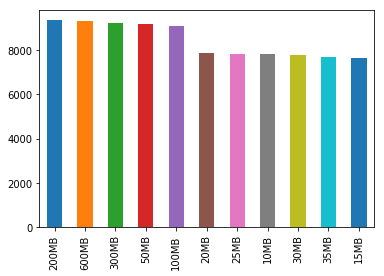

In [45]:
resumen_ene['vel_conexion'].value_counts().plot(kind='bar')

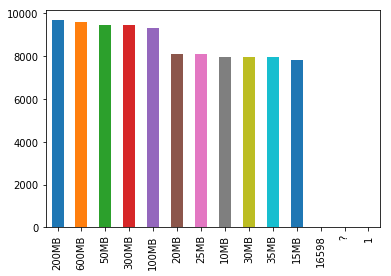

In [46]:
resumen_dic['vel_conexion'].value_counts().plot(kind='bar')

Aqui resulta que las tres últimas categorias parecen ser valores extraños, los cuales son unos pocos

In [47]:
resumen_ene['vel_conexion'].value_counts()

200MB    9345
600MB    9299
300MB    9212
50MB     9167
100MB    9099
20MB     7882
25MB     7840
10MB     7807
30MB     7761
35MB     7672
15MB     7627
Name: vel_conexion, dtype: int64

In [48]:
resumen_dic['vel_conexion'].value_counts()

200MB    9678
600MB    9622
50MB     9474
300MB    9460
100MB    9332
20MB     8113
25MB     8112
10MB     7969
30MB     7948
35MB     7947
15MB     7809
16598       1
?           1
1           1
Name: vel_conexion, dtype: int64

Vemos como son las entradas de valores de estos valores extraños

In [49]:
resumen_dic[resumen_dic['vel_conexion']=='?']

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
70528,73889,69,118.515385,6108,Castellón,2,0.0,NO,NO,0.0,NO,FIBRA,?,tv-familiar,74,99,12169,19080,2068


In [50]:
resumen_dic[resumen_dic['vel_conexion']=='1']

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
70426,73779,26,209.565464,7422,Pontevedra,5,1.0,NO,NO,0.0,NO,ADSL,1,tv-futbol,82,29,9667,7184,2677


In [51]:
resumen_dic[resumen_dic['vel_conexion']=='16598']

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
12,13,55,209.36555,137,Huelva,3,0.0,NO,NO,0.0,NO,FIBRA,16598,tv-familiar,118,13,18030,16766,13801


Entendemos que la velocidad de conexión irá relacionada con el tipo de conexión, por tanto podré ver los casos más comunes dentro de las clases conexión  los distintos tipos de velocidades de red e imputar a los casos raros o extraños a los más comunes

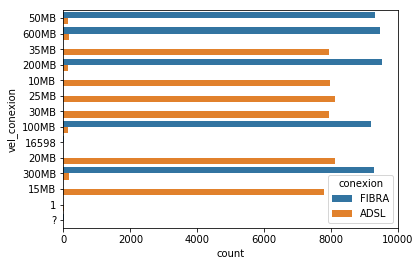

In [52]:
plt.figure()
sns.countplot(y= resumen_dic['vel_conexion'], hue = resumen_dic['conexion'])

In [53]:
adsl = resumen_dic.query('conexion == "ADSL"')
adsl.groupby('vel_conexion')['conexion'].count().sort_values(ascending=False)

vel_conexion
20MB     8113
25MB     8112
10MB     7969
30MB     7948
35MB     7947
15MB     7809
300MB     164
600MB     158
50MB      145
200MB     137
100MB     127
1           1
Name: conexion, dtype: int64

Vemos que dentro de las conexiones adsl, la velocidad de conexión más repetida es la de 20 MB 

In [54]:
resumen_dic['vel_conexion'] = resumen_dic['vel_conexion'].replace('1', '20MB')

In [55]:
fibra = resumen_dic.query('conexion == "FIBRA"')
fibra.groupby('vel_conexion')['conexion'].count().sort_values(ascending=False)

vel_conexion
200MB    9541
600MB    9464
50MB     9329
300MB    9296
100MB    9205
?           1
16598       1
Name: conexion, dtype: int64

Ahora en el caso fibra, la velocidad más común es la de 200MB

In [56]:
resumen_dic['vel_conexion'] = resumen_dic['vel_conexion'].replace('?', '200MB')
resumen_dic['vel_conexion'] = resumen_dic['vel_conexion'].replace('16598', '200MB')

### 2.4 Outliers

Echemos un vistazo a las variables numéricas donde analizaré los outliers

In [57]:
resumen_ene[num_cols_ene].describe()

,id,edad,facturacion,antiguedad,num_lineas,num_dt,imp_financ,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
count,92711.000000,92711.000000,92711.000000,92711.000000,92711.000000,92711.000000,92711.000000,92711.000000,92711.000000,92711.000000,92711.000000,92711.000000
mean,49997.623626,51.429237,207.488700,4391.413209,3.560214,0.071318,1.601433,125.109836,49.858960,12510.190495,9985.382781,10030.443960
std,28863.150364,19.585913,111.239476,2741.288056,1.085810,0.459214,6.366161,72.421075,29.208549,7217.671483,5774.903324,5786.754197
min,1.000000,18.000000,15.000439,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24963.500000,34.000000,111.368385,2009.000000,3.000000,0.000000,0.000000,62.000000,25.000000,6232.500000,4960.000000,5010.000000
50%,49999.000000,51.000000,207.089366,4388.000000,4.000000,0.000000,0.000000,125.000000,50.000000,12526.000000,9998.000000,10037.000000
75%,74990.500000,68.000000,304.349361,6764.500000,4.000000,0.000000,0.000000,188.000000,75.000000,18742.000000,14981.000000,15036.000000
max,100000.000000,85.000000,399.998433,9160.000000,5.000000,4.000000,39.991954,250.000000,100.000000,25000.000000,20000.000000,20000.000000


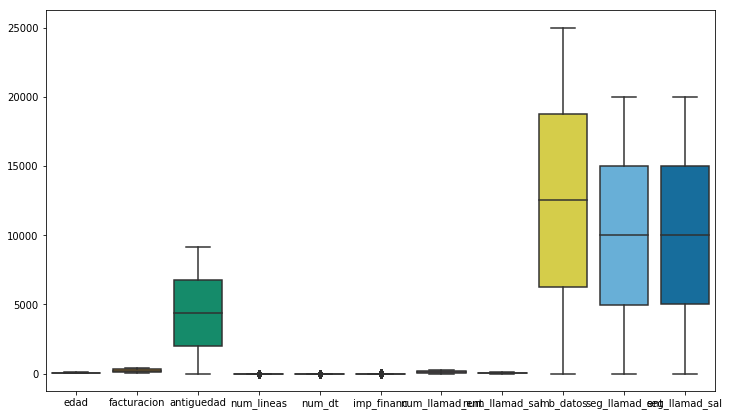

In [58]:
plt.figure(figsize=(12,7))
solo_num = resumen_ene[num_cols_ene].drop('id', axis=1)
sns.boxplot(data= solo_num, palette="colorblind")

Vamos a cada caso de manera singular para poder ver con claridad los valores extremos

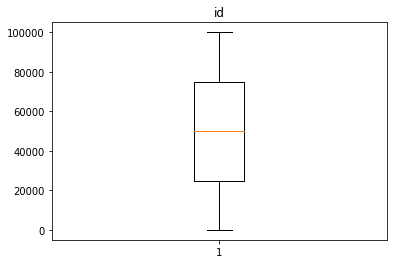

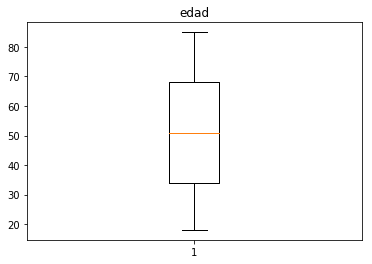

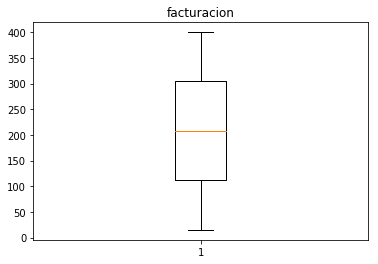

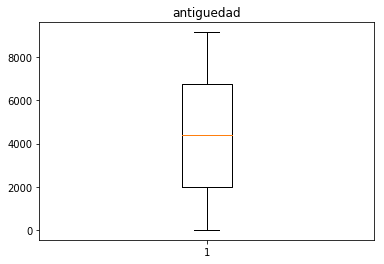

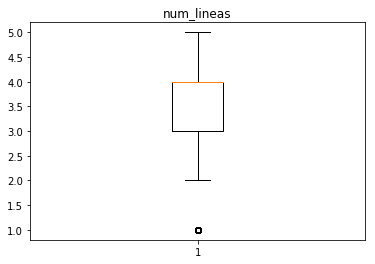

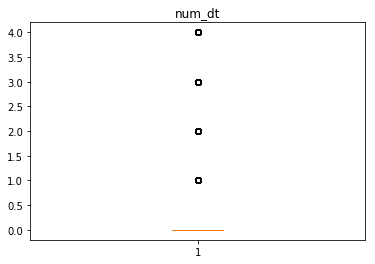

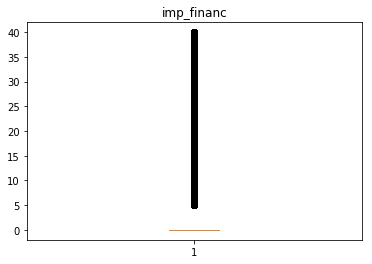

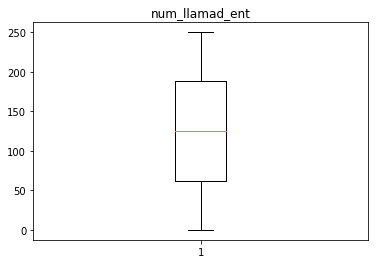

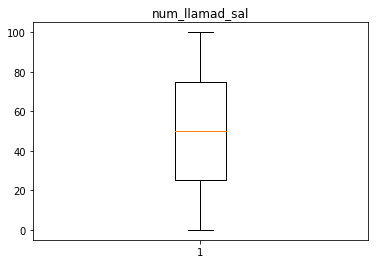

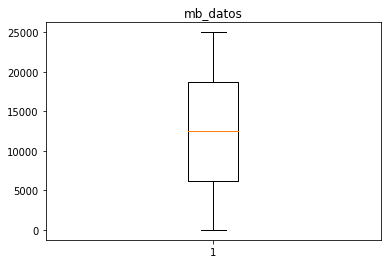

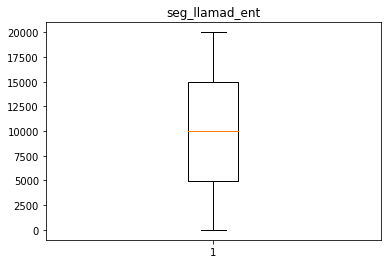

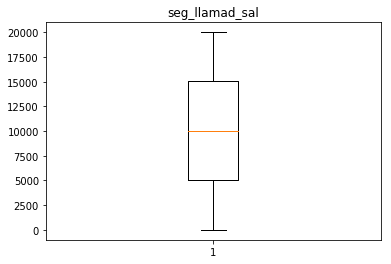

In [59]:
for num in num_cols_ene:
    plt.boxplot(resumen_ene[num])
    plt.title(num)
    plt.show()

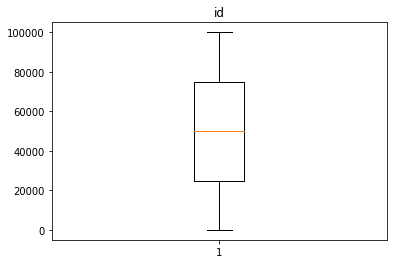

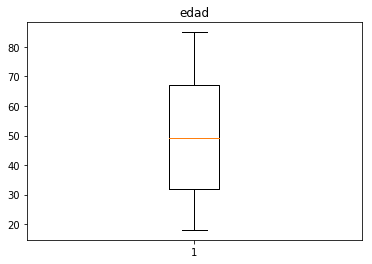

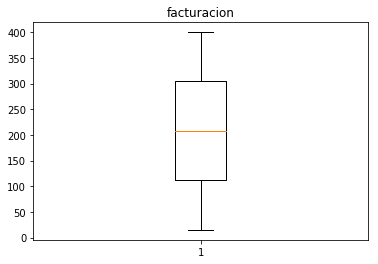

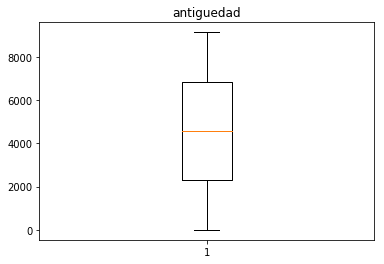

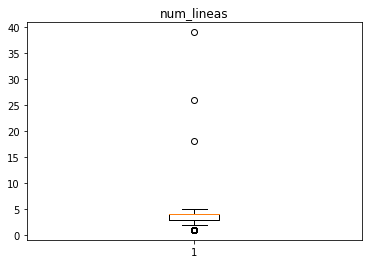

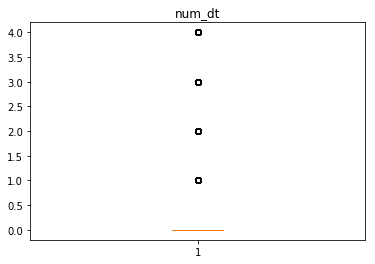

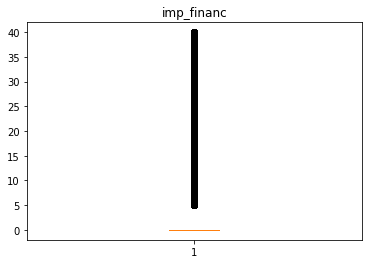

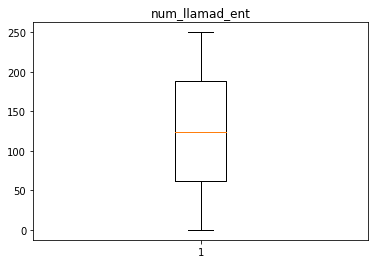

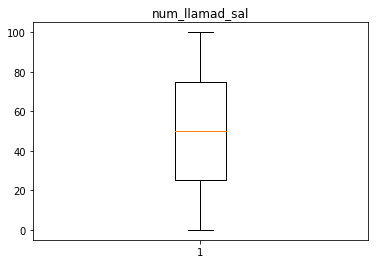

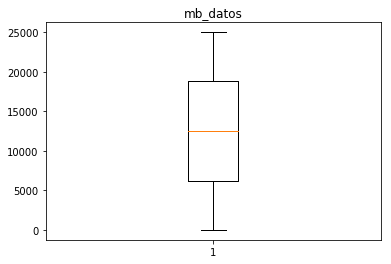

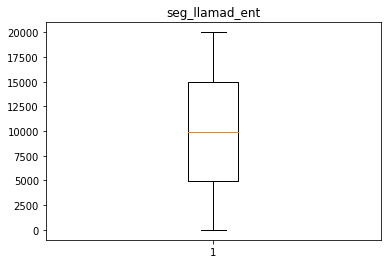

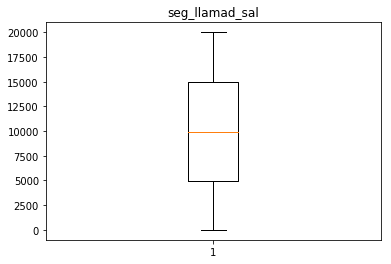

In [60]:
for num in num_cols_dic:
    plt.boxplot(resumen_dic[num])
    plt.title(num)
    plt.show()

In [61]:
def outliers(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    extreme= Q3+IQR*1.5
    outlier= df.query('@df>@extreme')
    outers= df.where(~df.isin(outlier), np.nan)
    return outers.isna().sum()

In [62]:
problem_ene = outliers(resumen_ene[num_cols_ene])
problem_ene

id                   0
edad                 0
facturacion          0
antiguedad           0
num_lineas           0
num_dt            2614
imp_financ        6666
num_llamad_ent       0
num_llamad_sal       0
mb_datos             0
seg_llamad_ent       0
seg_llamad_sal       0
dtype: int64

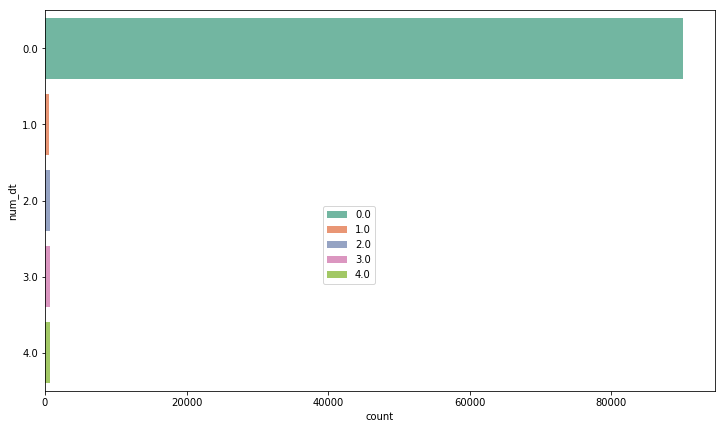

In [63]:
plt.figure(figsize=(12,7))
sns.countplot(y= 'num_dt', hue ='num_dt', orient = 'h', data = resumen_ene, palette = "Set2", dodge = False)
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.5))

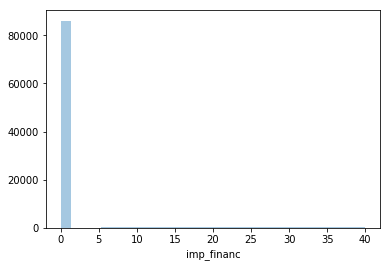

In [64]:
plt.figure()
sns.distplot(resumen_ene['imp_financ'],kde = False,bins=30)

Compruebo cuantos se agrupan por cada uno de los distintos valores que adoptan tanto las variables 'num_dt', 'imp_financ'

In [65]:
resumen_ene.groupby('imp_financ')['id'].count()

imp_financ
0.000000     86045
5.009999         1
5.013309         1
5.021418         1
5.025075         1
5.029066         1
5.033346         1
5.034479         1
5.035392         1
5.036532         1
5.039186         1
5.043134         1
5.043196         1
5.043990         1
5.050103         1
5.055543         1
5.055891         1
5.057597         1
5.071765         1
5.072348         1
5.072832         1
5.074305         1
5.082708         1
5.108784         1
5.110868         1
5.112685         1
5.123042         1
5.129121         1
5.138339         1
5.142866         1
             ...  
39.855373        1
39.855754        1
39.864281        1
39.872800        1
39.891068        1
39.893626        1
39.898476        1
39.901612        1
39.905872        1
39.909462        1
39.915151        1
39.916852        1
39.917491        1
39.917836        1
39.920371        1
39.920410        1
39.929720        1
39.934549        1
39.946777        1
39.951884        1
39.953256        1
3

In [66]:
resumen_ene.groupby('num_dt')['id'].count()

num_dt
0.0    90097
1.0      638
2.0      639
3.0      652
4.0      685
Name: id, dtype: int64

Al tener en cuenta que de los clientes que no se tuviese información alguna se sustituyese por 0, da la casualidad que lo componen en su mayoría, es decir, muchos casos se dan que no hay lineas en impagoy o no hay importe de financiación lo que si podría darse el caso y respetaremos dichos valores sin deshacerme de estos últimos

In [67]:
problem_dic = outliers(resumen_dic[num_cols_ene])
problem_dic

id                   0
edad                 0
facturacion          0
antiguedad           0
num_lineas           3
num_dt            4729
imp_financ        6372
num_llamad_ent       0
num_llamad_sal       0
mb_datos             0
seg_llamad_ent       0
seg_llamad_sal       0
dtype: int64

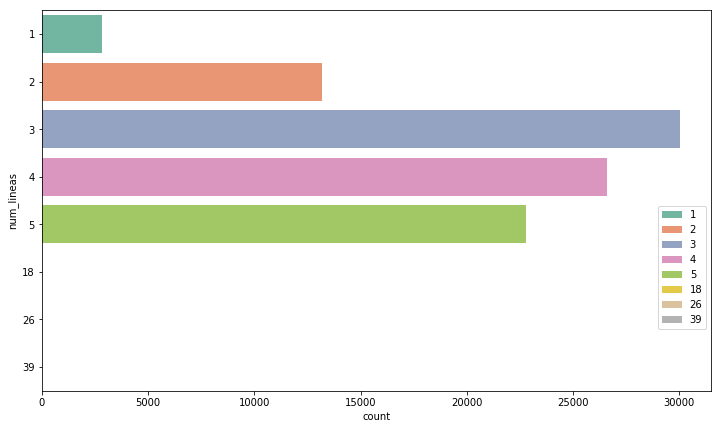

In [68]:
plt.figure(figsize=(12,7))
sns.countplot(y= 'num_lineas', hue ='num_lineas', orient = "v", data = resumen_dic, palette = "Set2", dodge = False)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

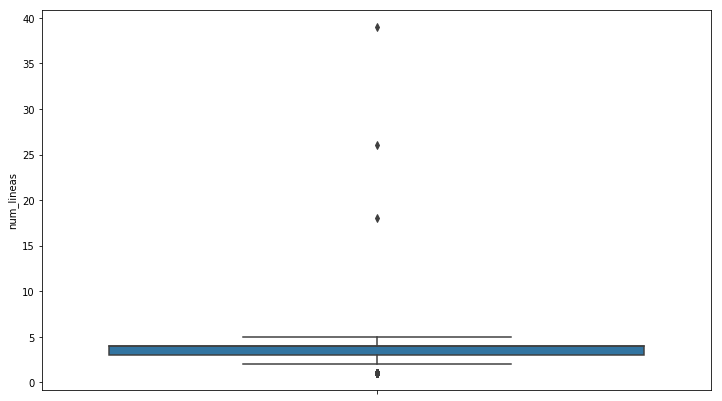

In [69]:
plt.figure(figsize=(12,7))
sns.boxplot(y ='num_lineas', data= resumen_dic)

In [70]:
resumen_dic[resumen_dic['num_lineas']==39]

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
8657,9067,24,369.283452,461,León,39,0.0,NO,NO,0.0,SI,FIBRA,300MB,tv-total,0,76,13523,0,12308


In [71]:
resumen_dic['num_lineas'].describe()

count    95467.000000
mean         3.559261
std          1.095542
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max         39.000000
Name: num_lineas, dtype: float64

En diciembre ocurre lo mismo que en enero con los casos de de las variables 'num_dt' y 'imp_financ', pero hay una peculiaridad en el caso de la variable num_lineas, donde se observan claramente tres valores outliers, los cuales podré deshacerme de los mismos

## 3. Muestrear los datos, construyendo un dataset de train y test.

Primero que haré es obtener la variable objetivo que necesito para las cosechas

In [72]:
resumen_ene['id'].isin(resumen_dic['id']).value_counts()

True     88382
False     4329
Name: id, dtype: int64

In [73]:
resumen_dic['id'].isin(resumen_ene['id']).value_counts()

True     88382
False     7085
Name: id, dtype: int64

### 3.1 Variable target

Compruebo cuantos clientes hay entre las dos cosechas para hacerme una idea de como será mi variable objetivo. A través del resultado de booleanos despues de comprobar cuales están y cuales no, los transformo en un entero 0 1. A continuación incluyo la lista obtenida en una nueva columna  de la cosecha

In [74]:
resumen_dic['permanencia'] = resumen_dic['id'].isin(resumen_ene['id'])

Adapto mi codificación de 0 para los que no se van (siguen en la cosecha) y 1 para los que se van (no están presentes)

In [75]:
resumen_dic['permanencia']= resumen_dic['permanencia'].apply(lambda x: 0 if x == True else 1)

In [76]:
y_diciembre= resumen_dic['permanencia'].value_counts()

In [77]:
tabla_y = pd.concat([y_diciembre], axis=1)
tabla_y.columns = ['permanencia_diciembre']
tabla_y

,permanencia_diciembre
0,88382
1,7085


### 3.2 Entrenamiento del modelo

Construyo el dataset de train y test. Es preciso dividir la variable target de las variables predictoras y tener en cuenta que dependiendo del modelo trasnformaré las variables categóricas o no

*DICIEMBRE*

In [78]:
target= resumen_dic['permanencia']
features= resumen_dic.drop(['permanencia'], axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split (features, 
                                                     target,
                                                     test_size = 0.3,
                                                     random_state = 12345,
                                                     stratify = target)

In [80]:
print(X_train.shape[0])
print(X_test.shape[0])

66826
28641


## 4. Construir un modelo analítico de clasificación que sea capaz de predecir cuando un cliente se fuga de la empresa.

### 4.1 Algoritmo seleccionados

In [81]:
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

- La **regresión logística** se utiliza generalmente para fines de clasificación. A diferencia de la regresión lineal, la variable dependiente solo puede tomar un número limitado de valores, es decir, la variable dependiente es categórica tal y como es nuestra variable y del modelo (0,1)
- Los **árboles de decisión** son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta. Son fáciles de interpretar aun cuando las relaciones entre predictores son complejas y se aplican casos de calsificación. Los modelos más típicamente conocidos de clasifcicación son **RandomForest y DecisionTrees**

### 4.2 Selección de variables 

Antes de lanzar el modelo de clasificación, debo adecuar las variables del modelo de diciembre que será de estudio

In [82]:
cat_cols= resumen_dic.select_dtypes(include=['object']).columns
num_cols = resumen_dic.select_dtypes(exclude=['object']).columns

Miremos como son las variables categoricas

In [83]:
resumen_dic[cat_cols].describe()

,provincia,incidencia,financiacion,descuentos,conexion,vel_conexion,TV
count,95467,95467,95467,95467,95467,95467,95467
unique,50,2,2,2,2,11,3
top,Zaragoza,NO,NO,NO,ADSL,200MB,tv-futbol
freq,1991,91893,89095,76313,48630,9680,49634


In [84]:
resumen_dic[num_cols].columns

Index(['id', 'edad', 'facturacion', 'antiguedad', 'num_lineas', 'num_dt',
       'imp_financ', 'num_llamad_ent', 'num_llamad_sal', 'mb_datos',
       'seg_llamad_ent', 'seg_llamad_sal', 'permanencia'],
      dtype='object')

Transformamos las variables predictoras de respuesta SI/NO en 1 y 0 para aquellos casos donde no haya muchos tipo de categorias como casos como las variables **incidencia, financiación, descuentos** 

Distribución de las variables numéricas y categóricas

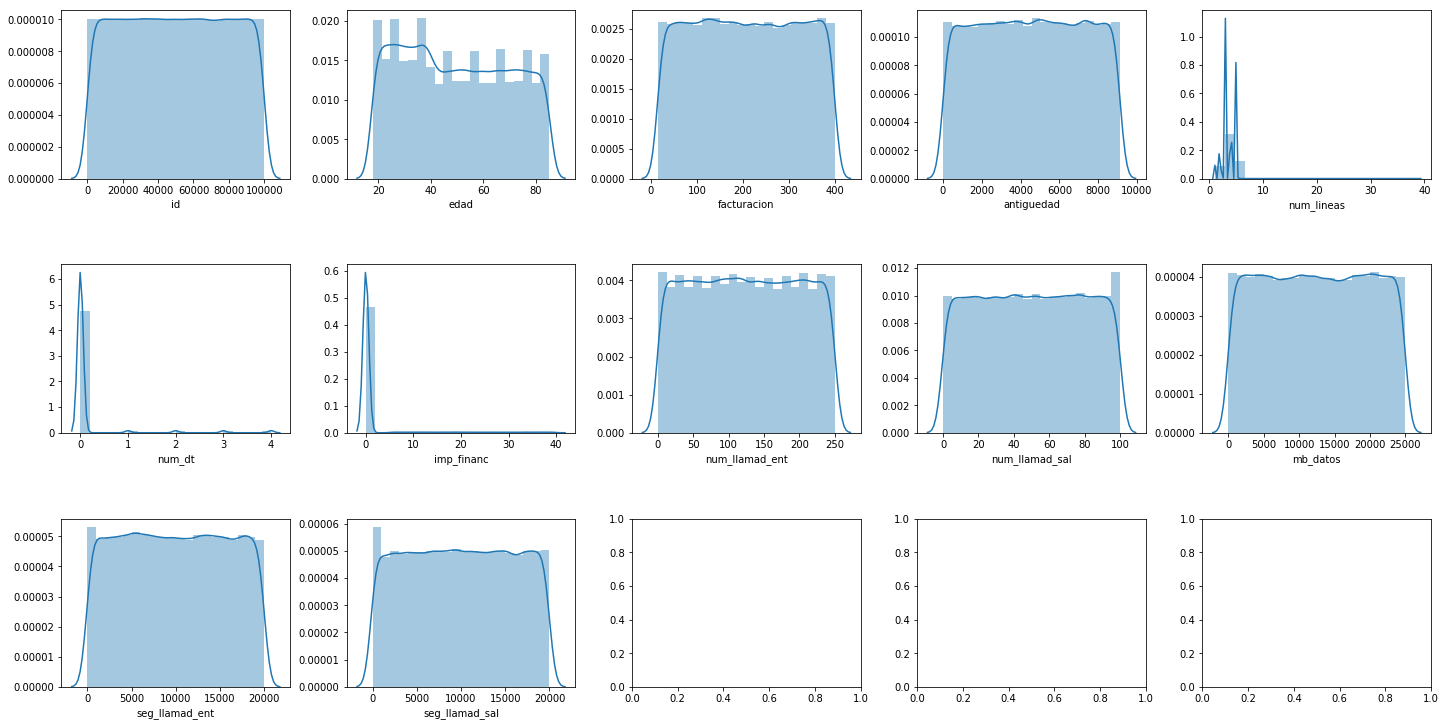

In [85]:
#Variables numéricas
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in resumen_dic[num_cols_dic].items(): 
    if  (k == 'permanencia'):
        sns.countplot(v, ax=axs[index])
    else:
        sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Muchas de las distribuciones como las variables id, edad, facturación, num_llamadas ent y sal, datos....presentan distribuciones muy homogeneas y simétricas, mientras que en num_lineas, num_dt, impac_finan presentan picos donde algunas hay picos entonto a cero (num_dt, impac_financ). El número de lineas está mas centralizado entorno a a valor central.

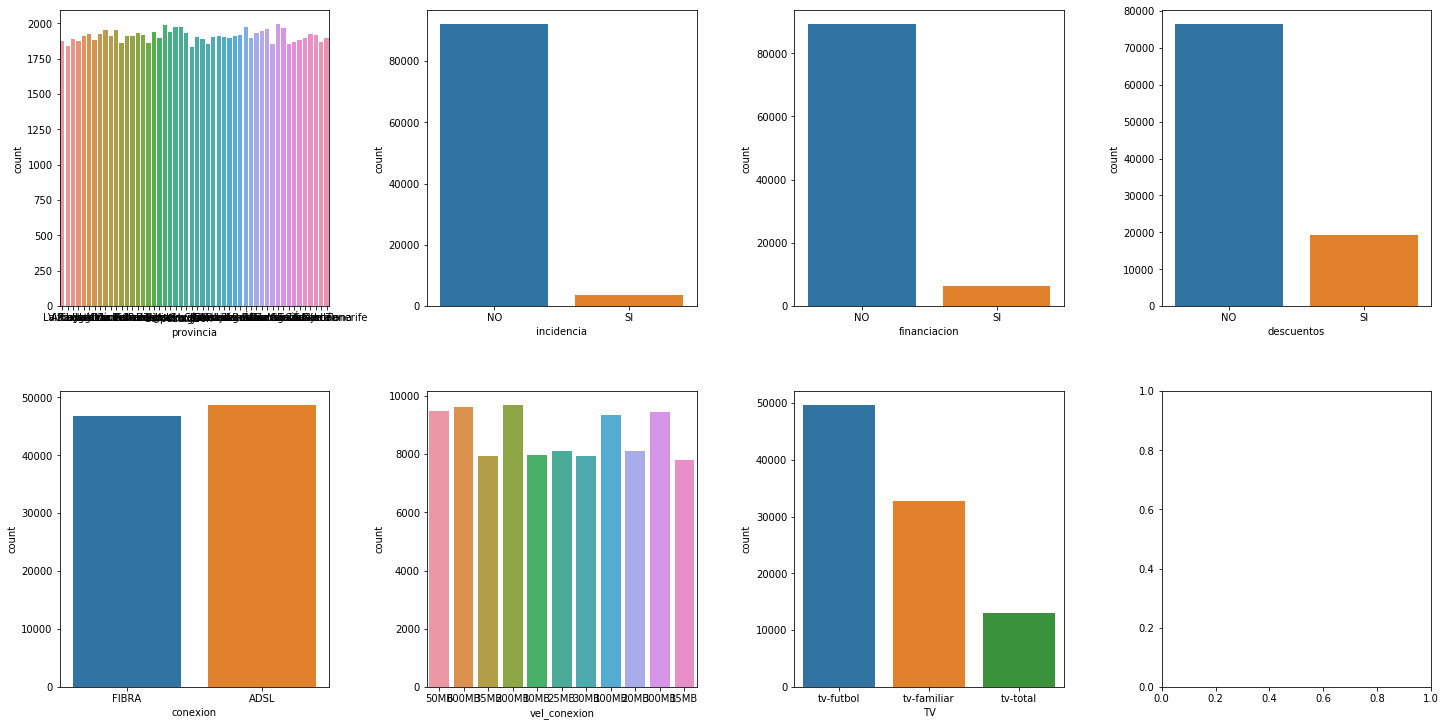

In [86]:
#Variables categóricas
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in resumen_dic[cat_cols_dic].items(): 
    sns.countplot(v, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Las variables categoricas de tipo respuesta SI/NO están bastante desbalanceadas entorno al NO, mientras que otras con mayor numero de categorias (mayores de 10 tipos) no hay una tendencia o zona destacable. Observable una diferencia mayor entre los que tienen adsl y fibra

Matriz correlaciones de diciembre

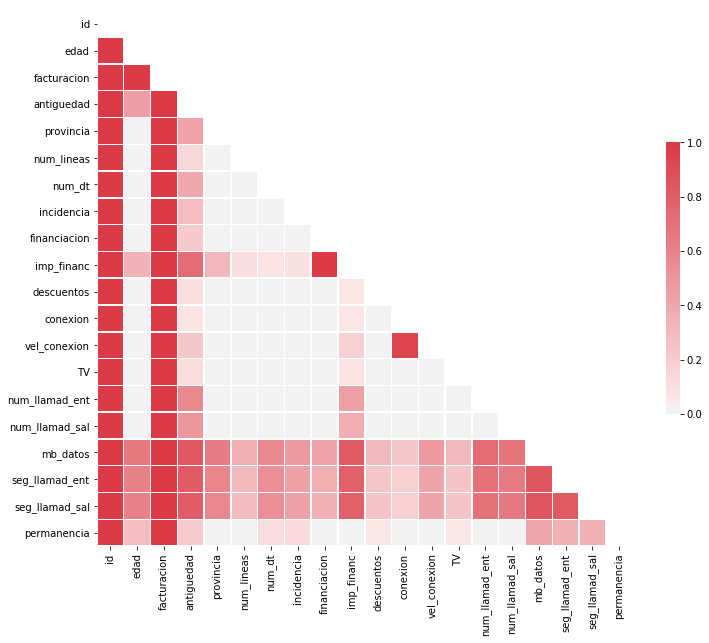

In [87]:
# Matriz Correlaciones
nmi_df_dic = pd.DataFrame(columns=resumen_dic.columns, index=resumen_dic.columns)

for col_1 in nmi_df_dic.columns:
    for col_2 in nmi_df_dic.columns:
        nmi_df_dic.loc[col_1, col_2] = nmi(resumen_dic[col_1], resumen_dic[col_2], average_method="min")

for col in nmi_df_dic.columns:
    nmi_df_dic[col] = pd.to_numeric(nmi_df_dic[col])

for col in nmi_df_dic.columns:
    nmi_df_dic[col] = nmi_df_dic[col].astype("float64")        

# Generate a mask for the upper triangle
mask = np.zeros_like(nmi_df_dic, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(nmi_df_dic, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [88]:
ordered_columns_nmi_dic = nmi_df_dic["permanencia"].sort_values(ascending=False).index
corr_dic = nmi_df_dic["permanencia"].sort_values(ascending=False).to_frame()

Variable respuesta

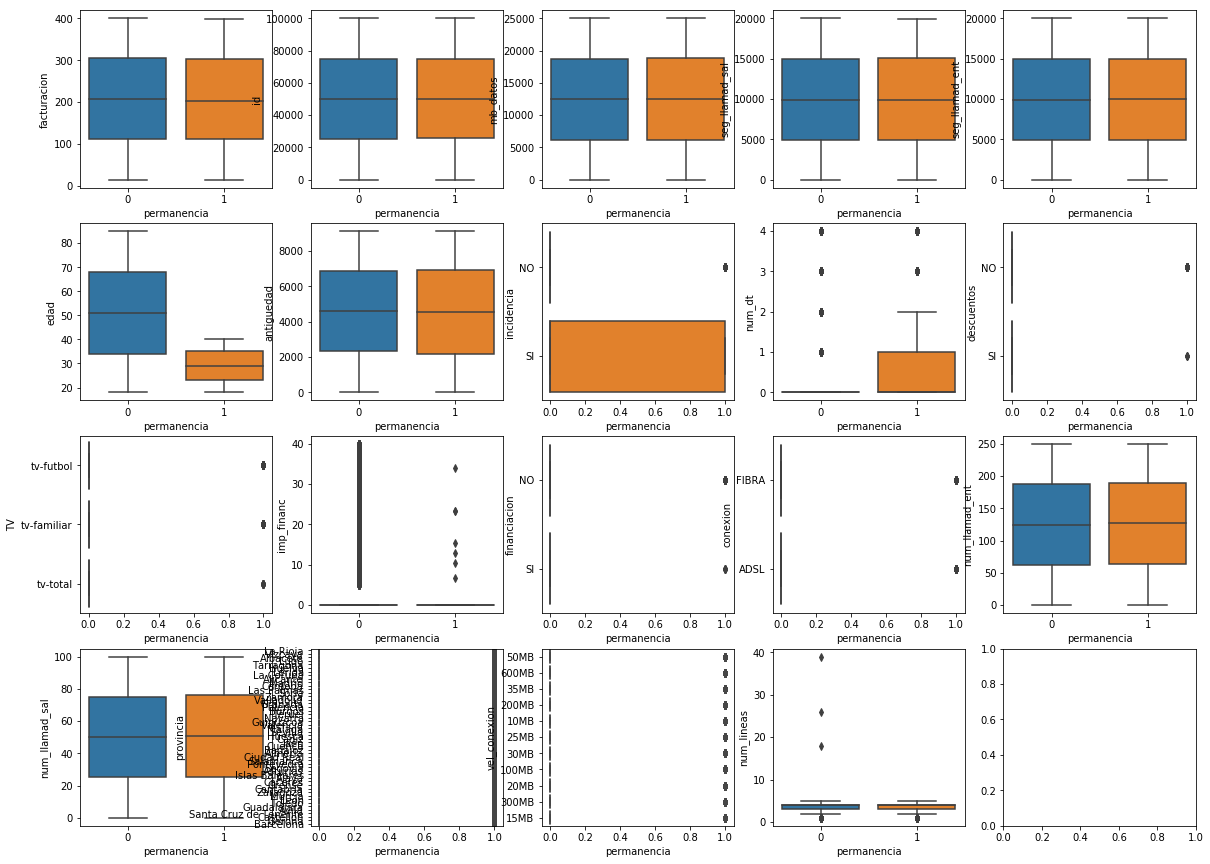

In [89]:
# Variables frente a la variable target
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 15))
axs = axs.flatten()

index = 0
for colname in ordered_columns_nmi_dic:
    if colname != "permanencia":
        sns.boxplot(ax=axs[index], x="permanencia", y=colname, data=resumen_dic)
        index += 1

Vemos la importancia que tiene que la edad a la hora de analizar los que se quedan, con edades que comprenden de los 35 a los 65 años mientras que los que van van de edades más jóvenes desde los 25 a los 35 años. También es de destacar lo desbalanceada que se presenta para casos donde se notifican incidencias, lo que claramente hará indicar que aquellos casos donde tengan lugar algún tipo de problema es más probable de que se trate de un caso que se quiera ir de la compañía. Sucede del mismo modo con el número de lineas en impago

Vemos el resumen de correlaciones de las dos cosechas

In [112]:
tabla_corr = pd.concat([corr_dic], axis=1, sort = False)
tabla_corr.columns = ['permanencia_diciembre']
tabla_corr

,permanencia_diciembre
permanencia,1.000000
facturacion,1.000000
id,1.000000
mb_datos,0.410230
seg_llamad_sal,0.356068
seg_llamad_ent,0.354738
edad,0.283835
antiguedad,0.205382
incidencia,0.128758
num_dt,0.120532


Hay variables claramente correlaciones altísimas entre facturación, id con la variable respuesta. El resto no presentan valores  o los segundos de llamadas entrantes y salientes altos de correlación quizás mb con la variable target

### 4.3 Transformación de las variables categóricas

Tenemos muchas variables predictoras de dos categorías tipo, lo que facilitará su transformación a numericas mediantes dummies. Incluso la variable TV de tres clases es susceptible de este tipo de transformaciones. tengo varias opciones para llevar a cabo esa trasnformación mediante dummmies, ordinal encoding o label encoding. 

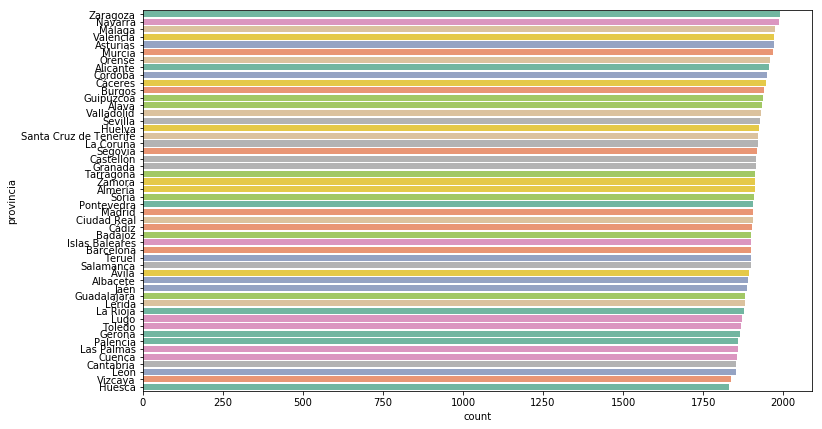

In [91]:
plt.figure(figsize=(12,7))
sns.countplot(y= 'provincia', hue ='provincia', orient = "v", data = resumen_dic, palette = "Set2", dodge = False, order = resumen_dic['provincia'].value_counts().index)
plt.legend([],[], frameon=False)

→One hot  encoding: debería usarse para variables nominales. Este enfoque funcione particularmente bien si no hay un orden claro en los datos categóricos;<br>
→Label encoding or numeric encoding  hay una clasificación indiscutible para las categorías. Para modelos basados ​​en árboles (como árboles de decisión y bosques aleatorios), puede esperar que la codificación de etiquetas funcione bien con variables ordinales.

Las variables con mayor número de categorías las transformaré a numéricas para evitar crear multiples columnas con categorías diferentes

In [113]:
from sklearn.preprocessing import LabelEncoder
# Variables categoricas a numericas 
le = LabelEncoder()
colum_categ =['vel_conexion', 'provincia']
for col in colum_categ:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Transformo a dummies las que presentan variables categoricas de respuesta SI/NO, además del tipo de conexión y TV. En general son categorias con pocos niveles de división

In [114]:
# Variables categoricas a dummies
column_categ = ['incidencia','financiacion','descuentos','conexion', 'TV']
for col in column_categ:
    X_train[col] = pd.get_dummies(X_train[col])
    X_test[col]= pd.get_dummies(X_test[col])

C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Aplico la transformación sobre las variables predictoras categóricas

### 4.4 Metricas de modelos

### - Logistic Regression

In [115]:
model_log = LogisticRegression(random_state=12345, solver='liblinear')
model_log.fit(X_train, y_train)
predictions = model_log.predict(X_test)
print('Accuracy Logistic Regression:',accuracy_score(y_test, predictions))

Accuracy Logistic Regression: 0.9362452428336999


### - DecisionTree

In [116]:
model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(X_train, y_train)
predictions= model_dt.predict(X_test)
print('Accuracy Decision Tree:', accuracy_score(y_test, predictions))

Accuracy Decision Tree: 0.9445550085541706


### - RandomForest

In [117]:
model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(X_train, y_train)
predictions= model_rf.predict(X_test)
print('Accuracy Random Forest:', accuracy_score(y_test, predictions))

Accuracy Random Forest: 0.9628155441499948


Modelos con accuracy muy altos, lo que me hace señalar que dado que hay una gran diferencia de pesos entre los que se quedan frente a los que se han ido, los modelos aprenderán muy bien de los primeros que son los que en mayor proporción estan mejor representados.Por consiguiente, se  realiza una pobre generalización y por tanto, sobreajustado

### 4.4 Evaluación del modelo

Al tratarse de clases muy desbalanceadas debemos prestar mayor atención a la curva de precisión que evalua el rendimiento de la clase positiva

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [98]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    

    
    return

#### Modelo logístico

Modelo presenta una curva roc idonea, pero nos interesa la curva de precisión donde la especificidad es mayor y encontramos más casos de falsos negativos que positivos, pero aun asi se adecúa a un modelo más idóneo

In [99]:
print_score(model_log, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 92.58%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
f1-score       0.961455     0.0  0.925771      0.480727      0.890087
precision      0.925771     0.0  0.925771      0.462885      0.857051
recall         1.000000     0.0  0.925771      0.500000      0.925771
support    26515.000000  2126.0  0.925771  28641.000000  28641.000000
_______________________________________________
Confusion Matrix: 
 [[26515     0]
 [ 2126     0]]



C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


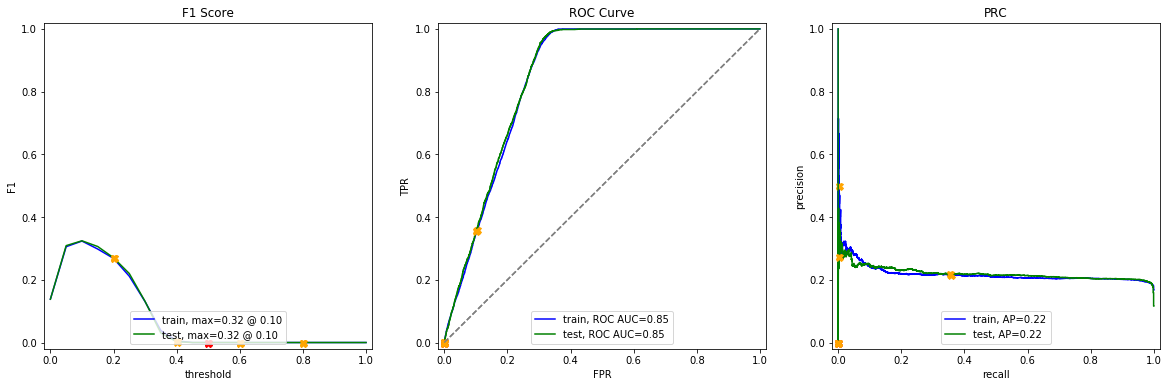

In [100]:
evaluate_model(model_log, X_train, y_train, X_test, y_test)

La gráfica de precisión captura el efecto de una gran cantidad de muestras negativas en el rendimiento del algoritmo. Hay un claro problema de desbalanceo que solo detecta los casos 0 y muy mala clasificiación de 1. En estos casos el mejor indicador es el ROC curve del modelo que en este caso se situa en 0.85

#### Modelo DecisionTree

In [101]:
print_score(model_dt, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 94.45%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
f1-score       0.970015     0.629517   0.94452      0.799766      0.944740
precision      0.970693     0.624133   0.94452      0.797413      0.944968
recall         0.969338     0.634995   0.94452      0.802167      0.944520
support    26515.000000  2126.000000   0.94452  28641.000000  28641.000000
_______________________________________________
Confusion Matrix: 
 [[25702   813]
 [  776  1350]]



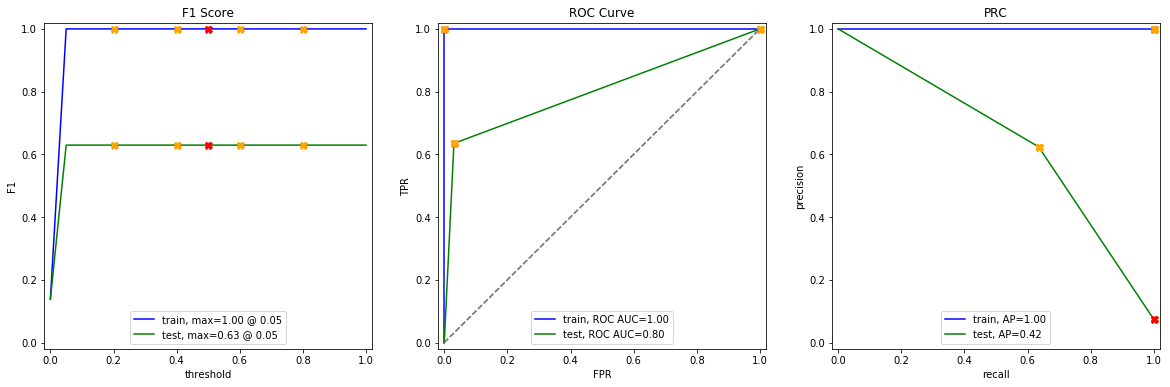

In [102]:
evaluate_model(model_dt, X_train, y_train, X_test, y_test)

En este caso visualmente es observable como el sobreajuste va en aumento entre test y el train, donde el train se distancia del test cada vez mas. Ojo con con el valor de la curva ROC y la diferencia entre train y test

#### Modelo RandomForest

In [103]:
print_score(model_rf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 96.25%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
f1-score       0.980038     0.691379  0.962501      0.835709      0.958611
precision      0.966174     0.888479  0.962501      0.927326      0.960407
recall         0.994305     0.565851  0.962501      0.780078      0.962501
support    26515.000000  2126.000000  0.962501  28641.000000  28641.000000
_______________________________________________
Confusion Matrix: 
 [[26364   151]
 [  923  1203]]



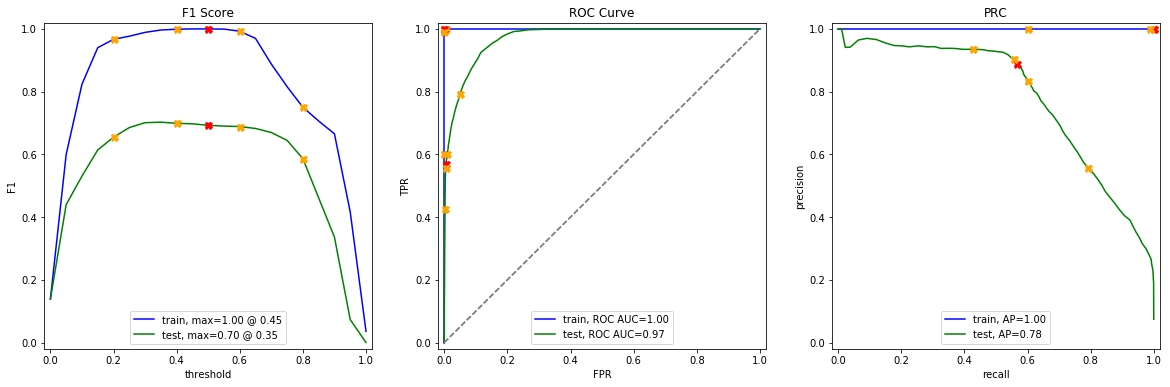

In [104]:
evaluate_model(model_rf, X_train, y_train, X_test, y_test)

El modelo entrena muy bien sobre los datos del train y no del mismo modo con el test donde una vez más la gran presencia de ceros afecta sensibilidad. Lo bueno es que la curva ROC es bastante buena y la mejor de todos los modelos

## 5. Realizar una mejora del modelo utilizando técnicas vistas en clase

### 5.1 Comprobación del overfitting

Por lo visto nuestros modelos vemos que no clasifican del todo bien a partir de las variables seleccionadas y eso se debe al desbalanceo de nuestras muestras

Counts Class 0:  61867
Counts Class 1:  4959
Proportion of class 0:  0.9257923562685182
Proportion of class 1:  0.07420764373148175


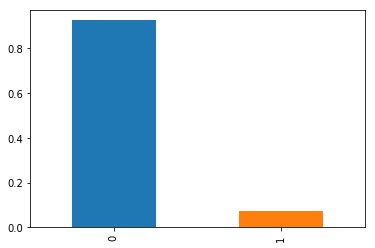

In [105]:
target_count= y_train.value_counts()
print('Counts Class 0: ',target_count[0])
print('Counts Class 1: ',target_count[1])
class_frequency = y_train.value_counts(normalize=True)
print('Proportion of class 0: ',class_frequency[0])
print('Proportion of class 1: ',class_frequency[1])
class_frequency.plot(kind='bar')

Hay que hacer frente a este problema de sobreajuste que bien podrían ser la siguientes medidas
- Emplear validación cruzada
- Optimizar los parámetros del modelo con grid search.
- Ajuste de peso en árboles, también en regresión logística mediante el parámetro class_weight= “balanced” 

### 5.2 Feature Engineering

veamos como es el peso de las variables para nuestro modelo

In [106]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None)    

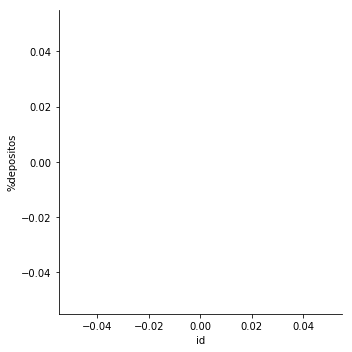

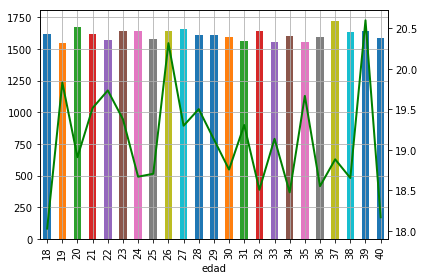

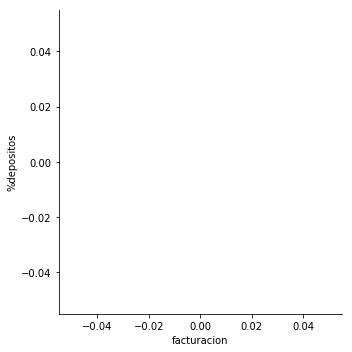

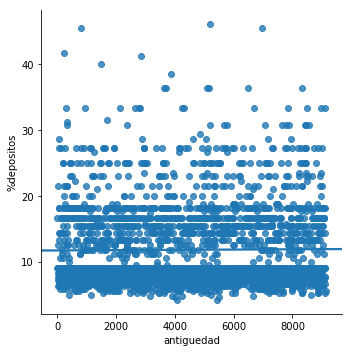

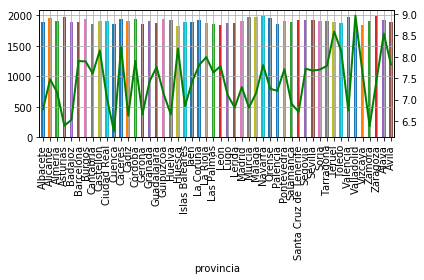

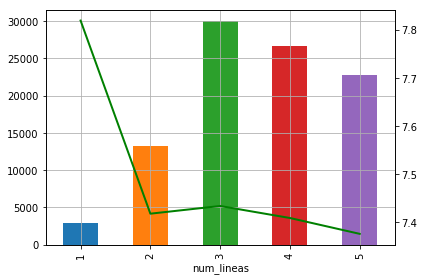

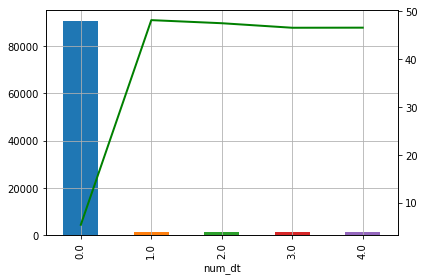

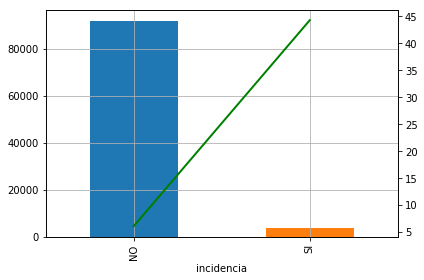

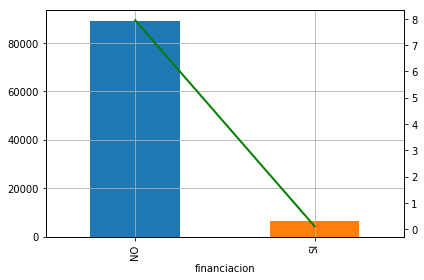

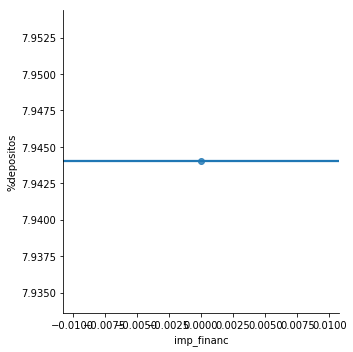

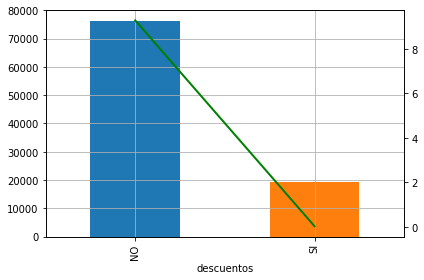

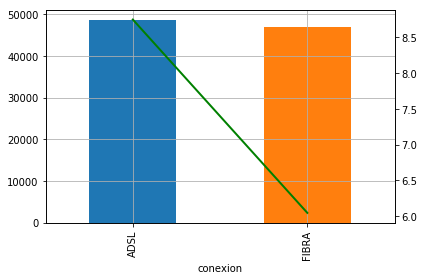

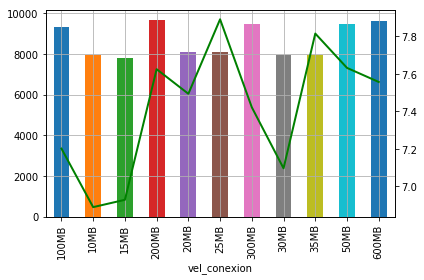

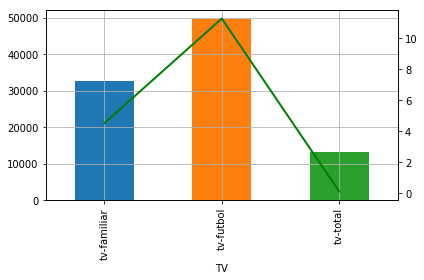

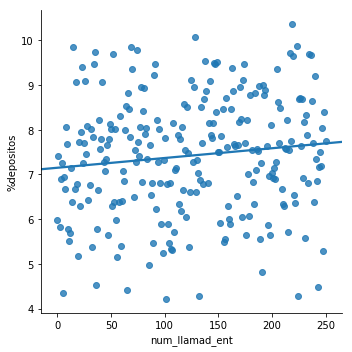

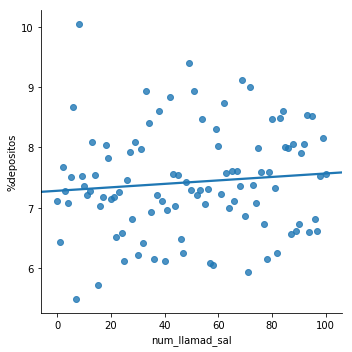

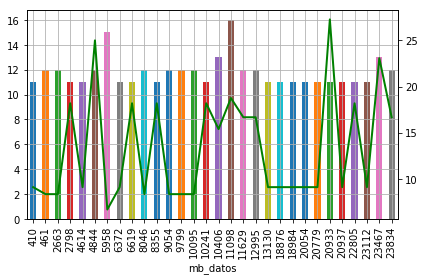

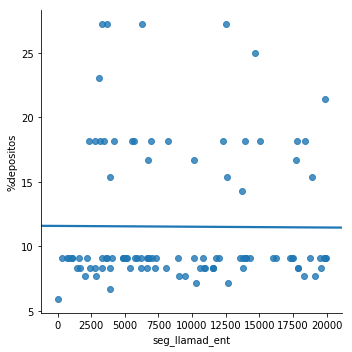

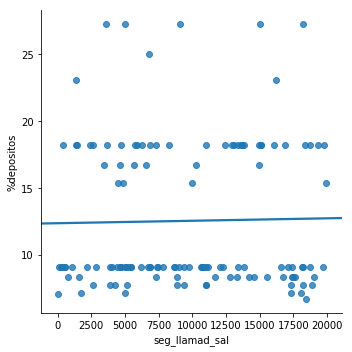

In [107]:
for i in resumen_ene.columns:
    proporciones_final (i, 'permanencia', resumen_dic)


No encuentro mejor manera de cambiar las variables de estudio, por tanto mantendré las mismas transfomaciones que antes

### 5.3 Mejor modelo

Pruebo a balancear el modelo de regresión logística, para ver si mejora

In [108]:
model_log = LogisticRegression(random_state=12345, solver='liblinear', class_weight ='balanced')
model_log.fit(X_train, y_train)
predictions = model_log.predict(X_test)
print('Accuracy Logistic Regression:',accuracy_score(y_test, predictions))

Accuracy Logistic Regression: 0.838483293181104


Para ver como mejoramos el modelo, aplicamos **GridSearch** con crosvalidación como solución al sobreajuste del modelo

In [118]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":[5, 10, 20], 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":[5, 10, 20], 
}

#Modelo con mejores parametros
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   21.1s finished


Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

In [119]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 96.31%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
f1-score       0.980407     0.688128   0.96313      0.834267      0.958711
precision      0.964903     0.924603   0.96313      0.944753      0.961911
recall         0.996417     0.547977   0.96313      0.772197      0.963130
support    26515.000000  2126.000000   0.96313  28641.000000  28641.000000
_______________________________________________
Confusion Matrix: 
 [[26420    95]
 [  961  1165]]



In [120]:
# Ajuste de parametros 
n_estimators = [10, 100, 5]
max_features = ['auto', 'sqrt']
max_depth = [10, 50,10]
min_samples_split = [5, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=10, verbose=2, n_jobs=-1)

#Modelo con mejores parametros
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 11.5min finished


Best parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5)

In [1]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

NameError: name 'print_score' is not defined

La curva roc nos dará pistas la calidad con la que clasifica el modelo y la métrica que mejor se adecua en estos casos. Por tanto si comparamos modelos:

In [138]:
from sklearn.metrics import roc_auc_score
models= [('random forest', rf_clf), ('decision tree', tree_clf), ('regresión logística', model_log)]
for i, model in models:  
    
    predictions = model.predict(X_test)

    acc = accuracy_score(y_test, predictions)
    roc = roc_auc_score(y_test, predictions)
    accuracy = "%s = %.4f" % (i, round(acc, 2))
    AUC_ROC = "%s = %.4f" % (i, round(roc, 2))
    print('accuracy of', accuracy)
    print('AUC-ROC of', AUC_ROC)

accuracy of random forest = 0.9600
AUC-ROC of random forest = 0.7900
accuracy of decision tree = 0.9600
AUC-ROC of decision tree = 0.7700
accuracy of regresión logística = 0.9400
AUC-ROC of regresión logística = 0.6000


### 5.3 Conclusion

El mejor modelo que resulta es el arbol de decision Random Forest ya que clasifica mejor que el resto en calidad (**AUC-ROC~ 0.77**)y mejor resultado da (**accuracy ~ 0.96**) además de balancear mejor la detección de falsos positivos y falsos negtivos. Por tanto no es tanto fiarse de del score sino cómo de fiable es el resultado que genera a la hora de clasificar positivos y negativos

## 6. Predecir los clientes de la cosecha de enero que más probabilidad tienen de cambiarse de operadora

Vamos a ver como funciona nuestro mejor modelo para una nueva cosecha, en este caso enero. Para ello es necesario aplicar las mismas transformaciones hechas anteriormente

In [125]:
colum_categ1 =['vel_conexion', 'provincia']
for col in colum_categ1:
    resumen_ene[col] = le.fit_transform(resumen_ene[col])
column_categ2 = ['incidencia','financiacion','descuentos','conexion', 'TV']
for col in column_categ2:
    resumen_ene[col] = pd.get_dummies(resumen_ene[col])

In [126]:
# Probabilidad de 1
modelo_proba = rf_clf.predict_proba(resumen_ene)[:,1]
modelo_proba = (pd.DataFrame(modelo_proba,columns=['probabilidad'],index=resumen_ene.index))
modelo_proba.sort_values(by=['probabilidad'],ascending=False,axis=0,inplace=True)

In [127]:
modelo_proba.head()

,probabilidad
76982,0.604167
79264,0.603333
37597,0.578333
69195,0.577500
86103,0.576667


Finalmente tenemos un modelo con hasta una probabilidad entorno al 60% de los casos de predecir clientes más probables a marcharse de la compañía. 

In [144]:
feature_list = list(features.columns)
importances = list(rf_clf.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: edad                 Importance: 0.1766
Variable: num_dt               Importance: 0.1636
Variable: incidencia           Importance: 0.1116
Variable: id                   Importance: 0.0889
Variable: descuentos           Importance: 0.0689
Variable: facturacion          Importance: 0.0419
Variable: seg_llamad_ent       Importance: 0.04
Variable: seg_llamad_sal       Importance: 0.0395
Variable: mb_datos             Importance: 0.0392
Variable: antiguedad           Importance: 0.0388
Variable: num_llamad_ent       Importance: 0.0369
Variable: vel_conexion         Importance: 0.0347
Variable: num_llamad_sal       Importance: 0.0332
Variable: provincia            Importance: 0.0304
Variable: imp_financ           Importance: 0.0125
Variable: TV                   Importance: 0.0118
Variable: num_lineas           Importance: 0.0112
Variable: financiacion         Importance: 0.0112
Variable: conexion             Importance: 0.0092


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Como podemos observar la variable mas determinante es la edad seguida del número de líneas en impago y de si ha tenido incidencias o no. CLaramente estas dos últimas iban a jugar un factor clave a la hora de decidir si un cliente sigue o no. La edad era determinante viendo su respuesta frente a la variable objetivo como hicimos anteriormente. Es más se entreveía que según fuese el rango de edad más o menos sabiamos si podría tratarse de un cliente que se quiera marchar